## 공간 데이터를 추출하고 csv 파일로 저장하는 파이썬 코드

- [공간데이터란](https://yganalyst.github.io/spatial_analysis/spatial_analysis_1/) (GIS data)
    - GIS(Geospatial Information System) 의 약자임
    - GIS를 표현하는 데이터응 아래와 같다
        ![이미지](https://yganalyst.github.io/assets/images/gis/geopandas_1/vector_raster.png)
        - Poiont : 도시 건출물의 좌표로, 주로 어떤 도시기반시설, 건물, 교차로(node) 등을 나타낼 때 사용한다.
        - Line : 주로 도로, 경로, 네트워크, 어떤 면의 중심선, 철도 등을 나타낼 때 사용한다
        - Polygon : 주로 어떤 지역, 군, 영역등을 나타낼 때 사용한다.
    - Polygon의 경우 shapefile이라고 하며 3개 이상의 확장 포맷을 통틀어 부르며 dbf, prj,shp 적어도 세 가지 파일이 있어야 제대로된 데이터를 볼 수 있다.
        - **dbf** : dBase 데이터베이서 파일로, 데이터프레임 형태의 정보를 갖고 있다.
        - **prj** : 공간 데이터의 좌표정보(좌표계)를 갖고 있으며, 좌표정의가 되어 있지 않을 경우 이 파일이 없을 수 있다.
        - **shp** : vector 타입의 도형 및 정보를 담고 있다.
        - **shx** : shp와 마찬가지이며, Auto CAD에서 주로 활용된다.



In [1]:
import folium
import gc
import glob
import geopandas as gpd
import matplotlib.pyplot as plt

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 128137 entries, 0 to 128136
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   ADR_MNG_NO  128137 non-null  object  
 1   BD_MGT_SN   128137 non-null  object  
 2   SIG_CD      128137 non-null  object  
 3   BUL_MAN_NO  128137 non-null  int64   
 4   RN_CD       128137 non-null  object  
 5   BULD_SE_CD  128137 non-null  object  
 6   BULD_MNNM   128137 non-null  int64   
 7   BULD_SLNO   128137 non-null  int64   
 8   EQB_MAN_SN  128137 non-null  int64   
 9   geometry    128137 non-null  geometry
dtypes: geometry(1), int64(4), object(5)
memory usage: 9.8+ MB


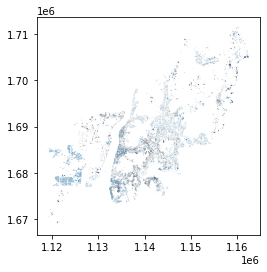

In [4]:
file_path ='./data/shp/test.shp'
# gdf = gpd.GeoDataFrame.from_file(file_path, encoding='cp949')
gdf = gpd.read_file(file_path)
gdf.info()
gdf.tail()
gdf.plot()
plt.show()

In [35]:
# Create Folium map.
center = [35.1856505,129.1]
tiles = ['cartodbpositron', 'Stamen Toner', 'OpenStreetMap']

# visualization
m = folium.Map(
    location = [center[0], center[1]],
    zoom_start = 12,
    tiles = tiles[0]
)


for _, r in gdf.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    # folium.Popup(r['BoroName']).add_to(geo_j)
    geo_j.add_to(m)
m

In [5]:
# 필터 전 데이타
gdf.head()

,ADR_MNG_NO,BD_MGT_SN,SIG_CD,BUL_MAN_NO,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,EQB_MAN_SN,geometry
0,26440119485357900008400000,2644011900101200000000001,26440,43911,4853579,0,84,0,13373,"POLYGON ((1121549.694 1674894.590, 1121548.505..."
1,26440119485357900008400000,2644011900101200000000002,26440,43912,4853579,0,84,0,13373,"POLYGON ((1121558.605 1674913.795, 1121560.787..."
2,26110107200600100005400000,2611010700100150008002342,26110,6342,2006001,0,54,0,127,"POLYGON ((1140401.191 1680309.364, 1140409.772..."
3,26440114313600700019400033,2644011400100130000000001,26440,42074,3136007,0,194,33,12453,"POLYGON ((1122730.151 1683810.746, 1122753.020..."
4,26440114313600700019400033,2644011400100130000000002,26440,42075,3136007,0,194,33,12453,"POLYGON ((1122787.185 1683820.986, 1122898.248..."


In [13]:
polys = gpd.read_file(file_path)
points = polys.copy()
points.head()
# change geometry 
points['geometry'] = points['geometry'].centroid
points.head()

,ADR_MNG_NO,BD_MGT_SN,SIG_CD,BUL_MAN_NO,RN_CD,BULD_SE_CD,BULD_MNNM,BULD_SLNO,EQB_MAN_SN,geometry
0,26440119485357900008400000,2644011900101200000000001,26440,43911,4853579,0,84,0,13373,POINT (1121552.632 1674893.663)
1,26440119485357900008400000,2644011900101200000000002,26440,43912,4853579,0,84,0,13373,POINT (1121567.222 1674917.735)
2,26110107200600100005400000,2611010700100150008002342,26110,6342,2006001,0,54,0,127,POINT (1140410.390 1680318.453)
3,26440114313600700019400033,2644011400100130000000001,26440,42074,3136007,0,194,33,12453,POINT (1122747.221 1683818.425)
4,26440114313600700019400033,2644011400100130000000002,26440,42075,3136007,0,194,33,12453,POINT (1122825.049 1683751.599)


In [15]:
# CSV로 저장할 파일명
new_file_name = "points.csv"

# GeoDataFrame을 CSV 파일로 저장
points.to_csv(f"./data/{new_file_name}", encoding='utf8', index=False)

# 메모리 정리
# del gdf
gc.collect()

45